# Comparison between k-Nearest Neighbors and Linear Regression models
**Ferney Beltran**

Based on the post  [kNN Regression - German Hernandez](https://github.com/gjhernandezp/ML/blob/master/kNN_regression1.ipynb) 

This Notebook proposes a comparison between the **kNN model** and the **Linear regresion model** (using the OLS implementation from statistical models and scikit-learn libraries) to fit a couple or Regressors for the well-known Boston Housing dataset. 

# kNN Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets ## imports datasets from scikit-learn
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score

#### Loading the Boston Housing Dataset

In [2]:
boston = datasets.load_boston() ## loads Boston dataset from datasets library

Let's explore the dataset

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [6]:
print(boston.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [7]:
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

Turning the dataset into a Pandas dataframe

In [8]:
# define the data/predictors as the pre-set feature names  
X = pd.DataFrame(boston.data, columns=boston.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
# Put the target (housing value -- MEDV) in another DataFrame
Y = pd.DataFrame(boston.target, columns=["MEDV"])
Y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### Creating the train-test datasets 70-30

In [10]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .30, random_state=25) #25% hold out for testing

Defining the kNNN model

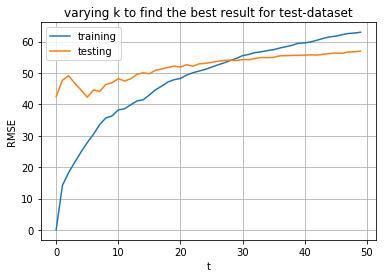

In [152]:
# instantiate learning model (k = 3)
trials = 50
error_training = np.zeros((trials,1))
error_testing = np.zeros((trials,1))
t = np.arange(0,trials)

for i in range(1,trials+1):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_train = knn.predict(X_train)
    error_training[i-1] = mean_squared_error(pred_train, y_train)
    pred_test = knn.predict(X_test)
    error_testing[i-1] = mean_squared_error(y_test, pred_test) #MSE

plt.plot(t,error_training,label="training")
plt.plot(t,error_testing,label="testing")
plt.xlabel("t")
plt.ylabel("RMSE")
plt.legend()
plt.grid()
plt.title("varying k to find the best result for test-dataset")

In [143]:
best_k = np.argmin(error_testing) + 1
print("Value of k, which minimizes the test-error: " + str(best_k))

Value of k, which minimizes the test-error: 6


In [144]:
knn = KNeighborsRegressor(n_neighbors=best_k)
    

In [145]:
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=6, p=2,
          weights='uniform')

In [146]:
pred_train = knn.predict(X_train)

In [147]:
train_error = mean_squared_error(pred_train, y_train)
print(str(train_error) + "%")

27.807929221594478%


(354, 1)


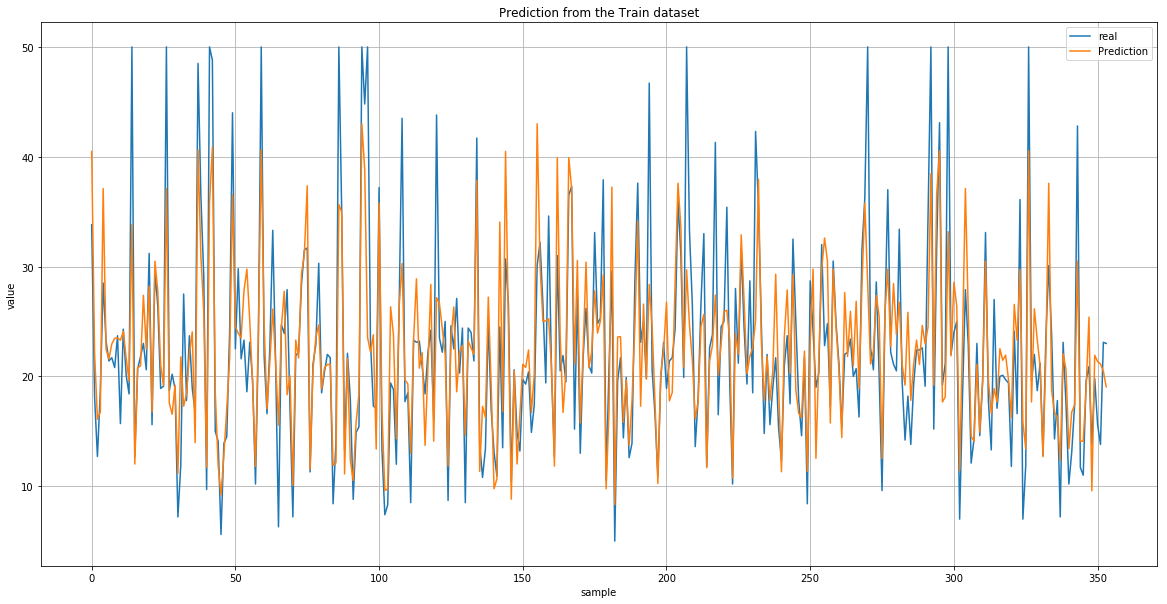

In [148]:
print(pred_train.shape)
t = np.arange(0,pred_train.shape[0])
fig = plt.figure(figsize=(20,10))
plt.plot(t,y_train,label="real")
plt.plot(t,pred_train,label="Prediction")
plt.xlabel("sample")
plt.ylabel("value")
plt.legend()
plt.grid()
plt.title("Prediction from the Train dataset")

### Predicting...

In [149]:
pred_test = knn.predict(X_test)

In [150]:
test_error = mean_squared_error(y_test, pred_test) #MSE
print(str(test_error) + "%")

42.27020650584795%


(152, 1)


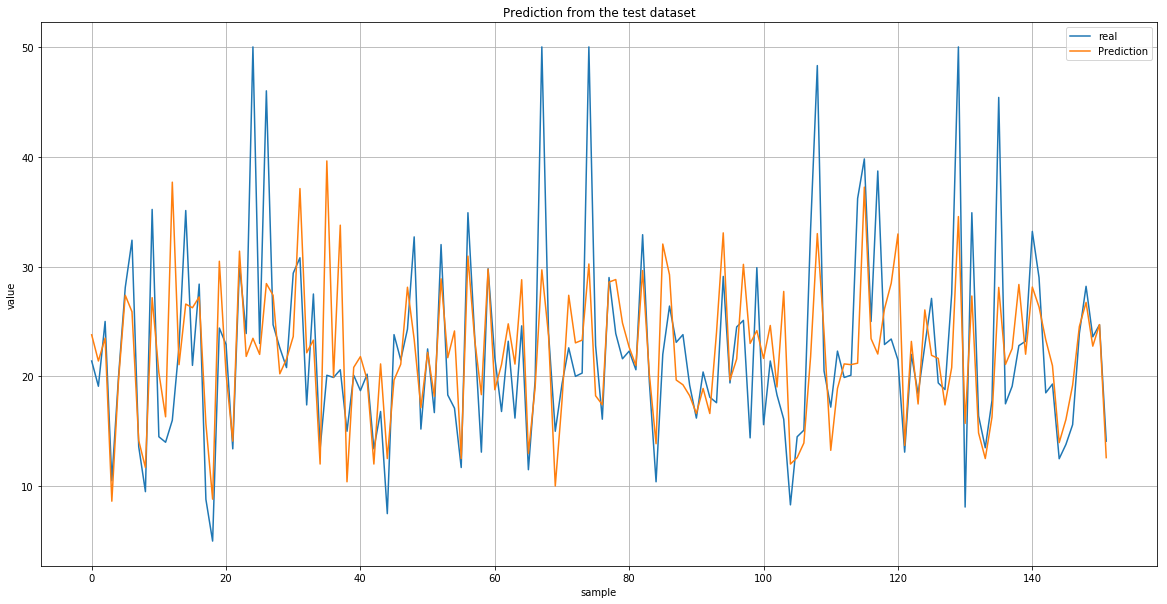

In [151]:
print(pred_test.shape)
t = np.arange(0,pred_test.shape[0])
fig = plt.figure(figsize=(20,10))
plt.plot(t,y_test,label="real")
plt.plot(t,pred_test,label="Prediction")
plt.xlabel("sample")
plt.ylabel("value")
plt.legend()
plt.grid()
plt.title("Prediction from the test dataset")

# Linear Regression

### Ordinary Least-square model

In [74]:
import statsmodels.api as sm

#Adding a constant to find the y-intercept 
x_test = sm.add_constant(X_test)

reg1 = sm.OLS(y_test,x_test) 
type(reg1)

statsmodels.regression.linear_model.OLS

In [75]:
results = reg1.fit()
print("")
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     35.56
Date:                Sun, 09 Dec 2018   Prob (F-statistic):           1.25e-37
Time:                        19:53:49   Log-Likelihood:                -432.43
No. Observations:                 152   AIC:                             892.9
Df Residuals:                     138   BIC:                             935.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.5574      8.773      4.053      0.

In [88]:
pred_train = reg1.predict(results.params,sm.add_constant(X_train))

In [89]:
train_error = mean_squared_error(pred_train, y_train)
print(str(train_error) + "%")

27.337866037572464%


(354,)


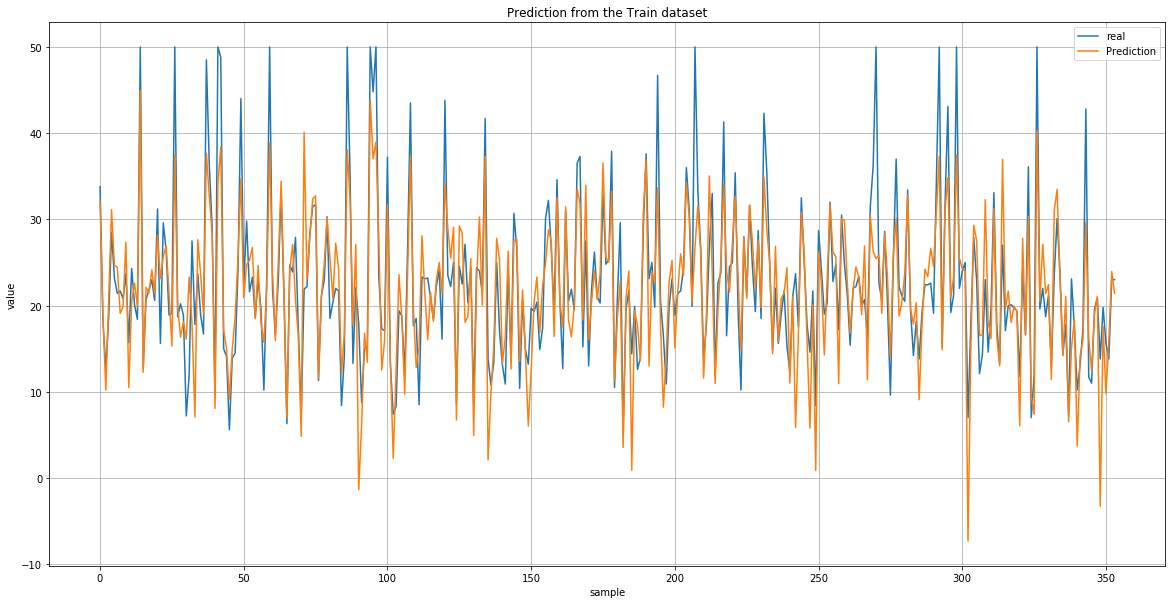

In [90]:
print(pred_train.shape)
t = np.arange(0,pred_train.shape[0])
fig = plt.figure(figsize=(20,10))
plt.plot(t,y_train,label="real")
plt.plot(t,pred_train,label="Prediction")
plt.xlabel("sample")
plt.ylabel("value")
plt.legend()
plt.grid()
plt.title("Prediction from the Train dataset")

In [91]:
pred_test = reg1.predict(results.params,sm.add_constant(X_test))

In [92]:
test_error = mean_squared_error(y_test, pred_test) #MSE
print(str(test_error) + "%")

17.322260005277347%


(152,)


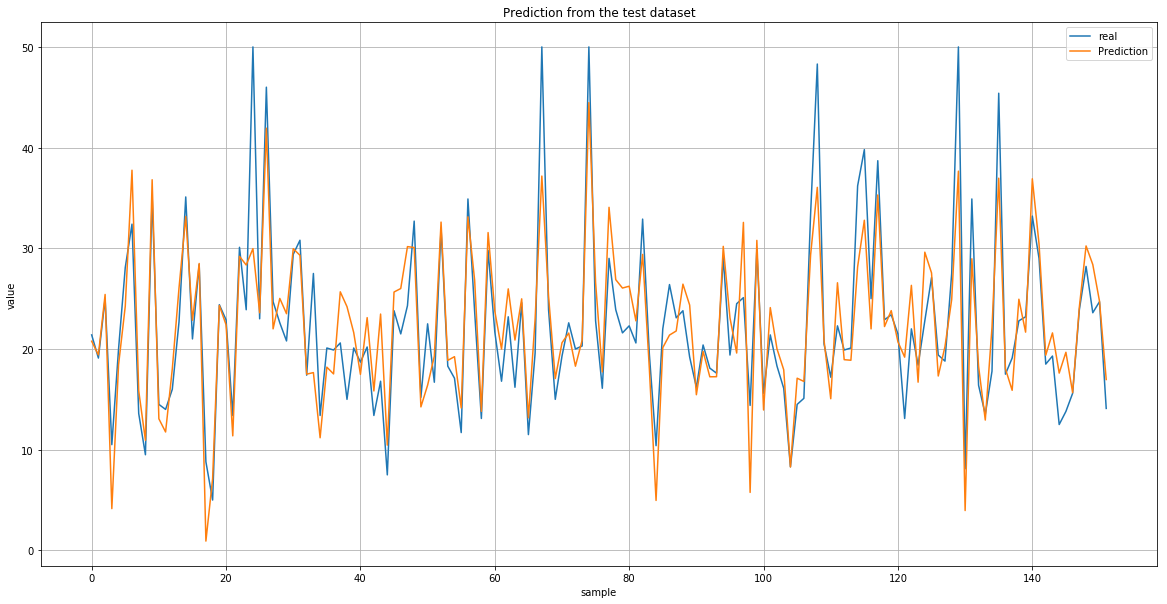

In [93]:
print(pred_test.shape)
t = np.arange(0,pred_test.shape[0])
fig = plt.figure(figsize=(20,10))
plt.plot(t,y_test,label="real")
plt.plot(t,pred_test,label="Prediction")
plt.xlabel("sample")
plt.ylabel("value")
plt.legend()
plt.grid()
plt.title("Prediction from the test dataset")

### Linear regression

In [67]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [68]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [69]:
reg.score(X_train, y_train)

0.7434563484487906

In [70]:
reg.coef_

array([[-1.13313932e-01,  5.04646602e-02,  2.78846321e-02,
         7.33292832e-01, -1.90087105e+01,  4.02296858e+00,
        -4.74740056e-03, -1.54985822e+00,  3.66436244e-01,
        -1.66639242e-02, -9.86838706e-01,  7.59096365e-03,
        -4.60467250e-01]])

In [71]:
reg.intercept_

array([38.14103213])

In [94]:
pred_train = reg.predict(X_train)

In [95]:
train_error = mean_squared_error(pred_train, y_train)
print(str(train_error) + "%")

22.654317313997495%


(354, 1)


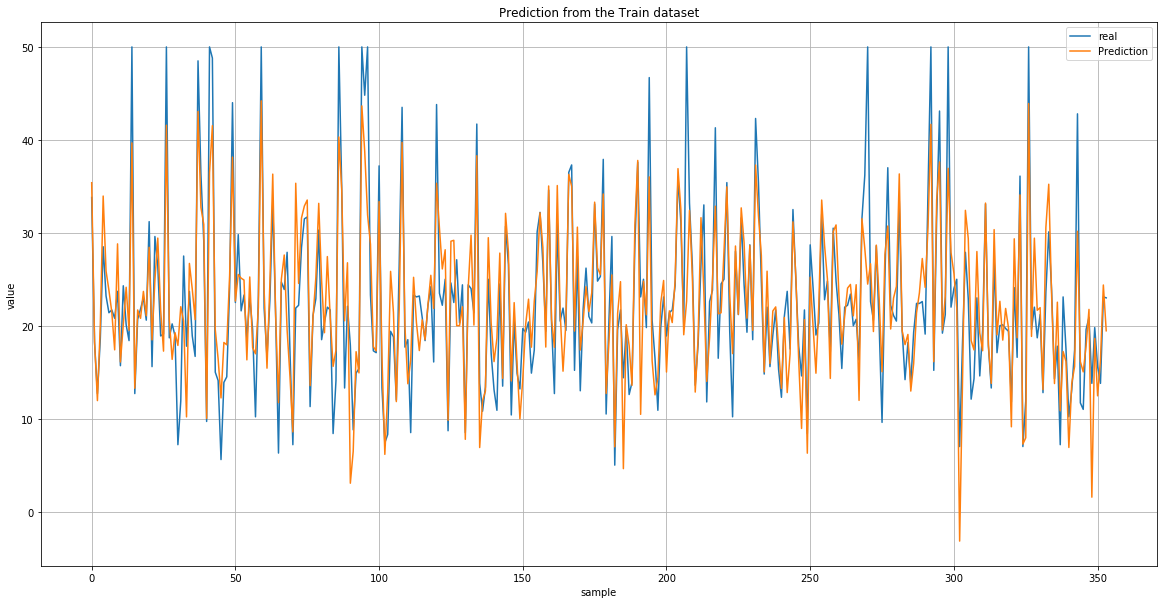

In [96]:
print(pred_train.shape)
t = np.arange(0,pred_train.shape[0])
fig = plt.figure(figsize=(20,10))
plt.plot(t,y_train,label="real")
plt.plot(t,pred_train,label="Prediction")
plt.xlabel("sample")
plt.ylabel("value")
plt.legend()
plt.grid()
plt.title("Prediction from the Train dataset")

In [97]:
pred_test = reg.predict(X_test)

In [36]:
test_error = mean_squared_error(y_test, pred_test) #MSE
print(str(test_error) + "%")

21.57181516357075%


(152, 1)


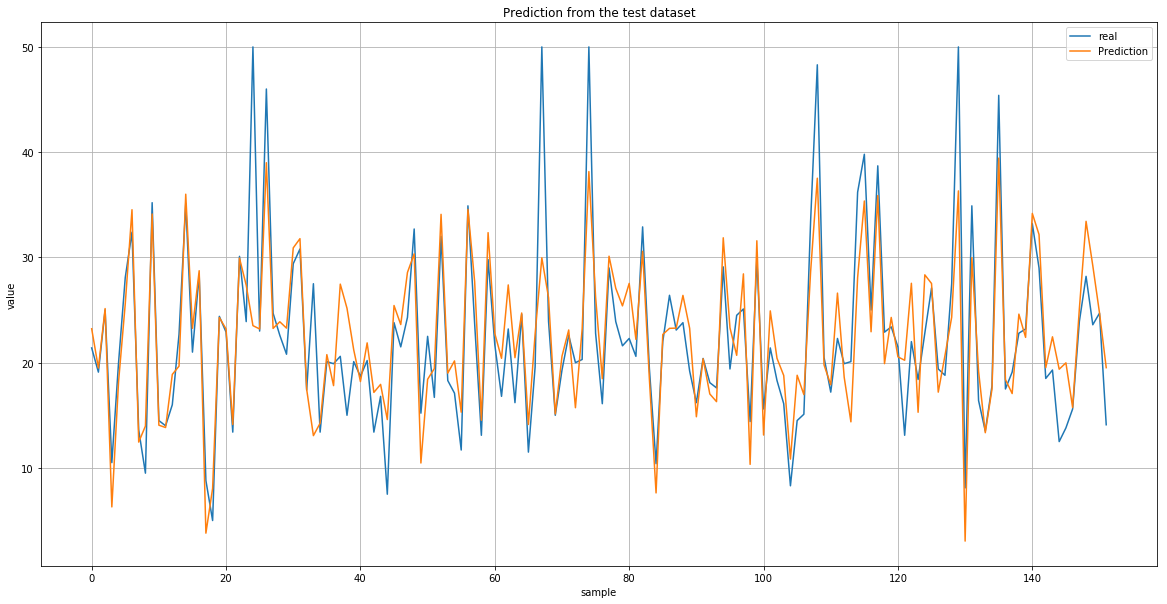

In [37]:
print(pred_test.shape)
t = np.arange(0,pred_test.shape[0])
fig = plt.figure(figsize=(20,10))
plt.plot(t,y_test,label="real")
plt.plot(t,pred_test,label="Prediction")
plt.xlabel("sample")
plt.ylabel("value")
plt.legend()
plt.grid()
plt.title("Prediction from the test dataset")

# Analysis

The results for the OLS regression and Linear Regression were quite similar: The R-Squared value for both cases was positive and close to 0.8. Which means that there is a positive correlation between the independent variables and the house price.

| Variable | OLS Regression | Linear Regression |
| --- | --- | --- |
| **R-Squared** | 0.770 | 0.744 |
| **Coefficients** |  |  |
| intercept | 35.5574 | 38.1410 |
| CRIM| -0.0949 | -0.1133 |
| ZN| 0.0175 | 0.0505 |
| INDUS| 0.0234 | 0.0279 |
| CHAS| 5.8524 | 0.7333 |
| NOX| -15.3187 | -19.0087 |
| RM| 2.9720 | 4.0230 |
| AGE| 0.0207 | -0.0048 |
| DIS| -1.0457 | -1.5499 |
| RAD| 0.1623 | 0.3664 |
| TAX| -0.0038 | -0.0167 |
| PTRATIO| -0.8130 | -0.9868 |
| B| 0.0078 | 0.0076 |
| LSTAT| -0.7505 | -0.4605 |
| **Train error**| 27.34% | 22.65% |
| **Test error**| 17.32% | 21.57% |

The worst result was for the kNN model, the train error was 27.81% and the test error was 42.27%. Even though the best k-value was searched. 

## References

1. https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html
2. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
3. https://lectures.quantecon.org/py/ols.html